In [1]:
import import_ipynb
from sampling import Sampler
from constants import Constants
import numpy as np

importing Jupyter notebook from sampling.ipynb
importing Jupyter notebook from constants.ipynb


## Don't run cells in this notebook without doing it deliberately. Many files will be created unnecessarily

In [2]:
sample = Sampler()
constants = Constants()

## Sample 1 Hydrogen ions

N_A = constants.constants['N_A'] # Avogadro's number

V_STP = 22.4 # Volume; in Liters, of 1 mole gas at Standard Temperature and Pressure conditions (STP)

V_LPM_reference = 10 # Volume flow rate; in Liters per minute taken as reference

V_LPS_reference = V_LPM_reference / 60 # Volume flow rate; in Liters per second taken as reference

T_sample_batch = 10 # Time; in seconds, taken to get volume from volume flow rate

V_sample_batch = V_LPS_reference * T_batch # Volume; in liters, of a sampling batch taken

V_ratio = V_sample_batch / V_STP 

n = N_A * V_ratio # number of molecules in the gas

natomes = 2 # Number of atoms in a molecule, 2 for hydrogen

n = n * natoms # The number of particles involved in the sampling

This procedure gives number of particles in the order of 10^23 which is just too large for simulation.
So instead we only use 100 particles for now.

In [3]:
# Constants separated
K = constants.constants['K'][0] # Boltzmann constant
amu = constants.constants['amu'][0] # Atomic mass unit in kg

m_amu = constants.constants['m_H'][0] # The relative atomic mass of hydrogen atom in amu
m_kg = m_amu * amu # The mass of Hydrogen atom in kg

In [4]:
#Define needed parameters
n = 100 # Consider 100 particles for now

#Position parameters
r = [-0.5, 0, 0]
# The chamber is considered as a cube of side 1 m, with [-0.5, -0.5, -0.5] being the bottom left corner
# and [0.5, 0.5, 0.5] being the top right corner
# Particles start at the center of the left face.

r_strategy = 'sample_same_given_position'
r_details = 'r=[-0.5,0,0] for 1m x 1m x 1m cube chamber. H atom'
#Velocity parameters
v_median = 800 # Median particle speed considered 800 m/s

T = 10000 #Plasma temperature = 10000 K 

v_strategy = 'sample_Maxwellian_velocity_all_random_direction'
v_details = 'v_median=800ms-1 T=10000K. H atom'

In [5]:
#Sample positions and velocities and write to file.

positions = sample.sample_same_given_position(r, n)

'''
sample.write_to_csv_file(positions, 'r', r_strategy, n, r_details)
'''

velocities = sample.sample_Maxwellian_velocity_all_random_direction(v_median, K, T, m_kg, n)

'''
sample.write_to_csv_file(velocities, 'v', v_strategy, n, v_details)
'''

"\nsample.write_to_csv_file(velocities, 'v', v_strategy, n, v_details)\n"

# Sample 1 attempt 2

v_median = 800 gives large velocity components like 2000, 3000
Perhaps v_median = 0 should be good

So only velocities file will be regenerated

In [6]:
v_median_2 = 0

v_details_2 = 'v_median=0ms-1 T=10000K. H atom'

velocities_2 = sample.sample_Maxwellian_velocity_all_random_direction(v_median_2, K, T, m_kg, n)

'''
sample.write_to_csv_file(velocities_2, 'v', v_strategy, n, v_details_2)
'''

"\nsample.write_to_csv_file(velocities_2, 'v', v_strategy, n, v_details_2)\n"

### Sample 1 attempt 3

we were using Hydrogen atom, but let's use Hydrogen gas instead and try.

Only velocities will be regenerated

In [7]:
v_details_3 = 'v_median=0ms-1 T=10000K. H2 gas'

velocities_3 = sample.sample_Maxwellian_velocity_all_random_direction(v_median_2, K, T, m_kg * 2, n)

'''
sample.write_to_csv_file(velocities_3, 'v', v_strategy, n, v_details_3)
'''

"\nsample.write_to_csv_file(velocities_3, 'v', v_strategy, n, v_details_3)\n"

# Sample 2

## 2 a position
All particles are 0.5 m away from the center [0,0,0] but in a uniform random direction

In [8]:
positions_p2 = sample.sample_same_given_distance_all_random_direction(d=0.5, n=100)
r_strategy_p2 = 'sample_same_given_distance_all_random_direction'
r_details_p2 = 'd=0,5m from center [0,0,0] for 1m x 1m x 1m cube chamber'
#sample.write_to_csv_file(positions_p2, 'r', r_strategy_p2, 100, r_details_p2)

## 2 b velocity
Particle speeds are sampled from parabolic distribution
velocity directions are uniformly randomly sampled

In [9]:
R = constants.constants['R'][0]
T_p2 = 10000 # plasma temperature 10000 K
mH_gmol = constants.constants['m_H'][0]
mH_kgmol = mH_gmol * (10**(-3))
sqrt_pi = np.sqrt(np.pi)
# Mean to be used equal to mean speed of Maxwellian distribution
maxwell_mean = (2/sqrt_pi) * np.sqrt( (2 * R * T_p2)/ mH_kgmol)
# Standard deviation to be used such that
# Variance = RMS of Maxwellian - (Mean of Maxwellian)**2 
maxwell_std_coeff = np.sqrt(3 - (8/(np.pi**2)))
maxwell_std_speed = maxwell_std_coeff * np.sqrt( (R * T_p2)/ mH_kgmol)
# Found emperically
maxwell_speed_scale = 30049.5113130523

In [10]:
### MAIN part where sampling was done ###
velocities_p2 = sample.sample_parabolic_speed_f1_all_random_direction(n=100, loc=maxwell_mean, scale=maxwell_speed_scale)
v_strategy_p2 = 'sample_parabolic_speed_f1_all_random_direction'
v_details_p2 = 'n=100, parameters based on 10000K Maxwellian'
#sample.write_to_csv_file(velocities_p2, 'v', v_strategy_p2, 100, v_details_p2)

(array([13.,  9.,  4.,  7.,  4.,  9.,  5.,  9.,  8.,  3.,  4.,  3.,  3.,
         4.,  1.,  6.,  2.,  2.,  2.,  2.]),
 array([  733.48899315,  2739.42868759,  4745.36838202,  6751.30807646,
         8757.24777089, 10763.18746533, 12769.12715977, 14775.0668542 ,
        16781.00654864, 18786.94624308, 20792.88593751, 22798.82563195,
        24804.76532639, 26810.70502082, 28816.64471526, 30822.58440969,
        32828.52410413, 34834.46379857, 36840.403493  , 38846.34318744,
        40852.28288188]),
 <BarContainer object of 20 artists>)

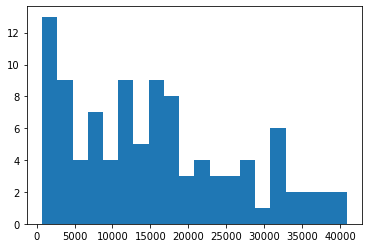

In [64]:
# To plot and see the speed distribution before saving to csv file
import matplotlib.pyplot as plt
speeds = []
def norm(x, y, z):
    return np.sqrt((x*x)+(y*y)+(z*z))
for i in range(len(velocities_p2)):
    speeds.append(norm(velocities_p2[i][0], velocities_p2[i][1], velocities_p2[i][2]))
speeds = np.array(speeds)
plt.hist(speeds, 20)
#plt.savefig('parabolicspeedsampling', dpi='figure', format='png')

In [61]:
# Writing to the csv file
# sample.write_to_csv_file(velocities_p2, 'v', v_strategy_p2, 100, v_details_p2)

SUCCESS
/home/kushik/Kushik/VIT/Eighth semester/MagneticMirror/csvfiles/sampling/100 v sample_parabolic_speed_f1_all_random_direction n=100, parameters based on 10000K Maxwellian 06-04-2022 17:44:46:811591


In [41]:
# This was done to determine the scale parameter to be passed to sample the parabolic velocities
# This is correct to 10**(-10) which is the highest precision output during the process.
import scipy.stats as stats
def find_scale(maxwell_mean, maxwell_std_speed):
    required = maxwell_std_speed
    current_scale = 30049.5113130523
    current_std = stats.rdist.std(c=4, loc=maxwell_mean, scale=current_scale)
    i = 0
    while True:
        i+= 1
        diff = required - current_std
        
        if np.abs(diff) < 10**(-11):
            break
        
        '''if np.close(current, required):
            break
        '''
            
        if diff > 0:
            current_scale = current_scale + 10**(-11)
            current_std = stats.rdist.std(c=4, loc=maxwell_mean, scale=current_scale)
        if diff < 0:
            current_scale = current_scale - 10**(-11)
            current_std = stats.rdist.std(c=4, loc=maxwell_mean, scale=current_scale)
            
        if i%100 == 0:
            print(f'Current_std:{current_std} Current_scale:{current_scale} i:{i}\n')
    return current_scale
#maxwell_speed_scale = find_scale(maxwell_mean=maxwell_mean, maxwell_std_speed=maxwell_std_speed)

In [47]:
# We check the value of the standard deviation of this distribution
stats.rdist.std(c=4, loc=maxwell_mean, scale=maxwell_speed_scale)

13438.54999732678

In [48]:
# Indeed is equal to the Maxwellian standard deviation
maxwell_std_speed

13438.549997326772